## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo VI - Redes neurais para dados sequenciais</span>


### <span style="color:darkred">Avaliação (com soluções)</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

As respostas devem ser dadas no Moodle, use esse notebook apenas para gerar o código necessário para obter as respostas

---

---

### Questão 1)

Quais dos cenários abaixo não necessitam de redes recorrentes que consideram a dependência sequencial dos dados?

 (a) Classificação de qualidade do ar usando série temporal multivariada a partir de sensores IoT<br>
 <font color='red'>(b) Regressão do consumo de quilômetros por hora de automóveis fabricados no Brasil com base em suas características: fabricante, modelo, peso do veículo, número de litros do porta-malas e cavalos de potência.</font><br>
 (c) Tradução automática de uma sentença do Inglês para o Português<br>
 (d) Regressão a probabilidade de transbordamento de um rio com base em dados do nível do rio obtido por sensor e índices pluviométricos e metereológicos, todos adquiridos a cada 1 segundo.<br>
 
 **Justificativa**: Das alternativas, a regressão do consumo de um veículo é a única que não possui aspectos sequenciais, sendo possível assumir o cenário i.i.d. visto que as características de um determinado automóvel não afetam as características de outro automóvel. As demais são de tal forma que a ordenação/sequência das instâncias é relevante para o problema.

---

### Questão 2)

Qual o mecanismo pelo qual unidades recorrentes GRU e LSTM são capazes de considerar a sequência dos dados durante o aprendizado dos parâmetros do modelo?

(a) Mecanismo de atenção que realiza o produto interno entre os elementos de entrada utilizando uma janela definida pelo time step<br>
<font color='red'>(b) A saída do neurônio na iteração atual é combinada com a entrada da próxima iteração<br></font>
(c) Combinar as features de entrada multiplicando cada feature por um peso independente e passando essa combinação para o próximo neurônio<br>
(d) Armazenar em um histórico o valor de entrada em cada iteração $i$, combinando a entrada atual com a entrada na próxima iteração $i+1$<br>

 **Justificativa**: (a) é incorreta pois o mecanismo de atenção não é utilizado na formulação de unidades recorrentes, (c) é incorreta pois descreve um neurônio de camada densa convencional, (d) é incorreta pois a unidade recorrente não armazena dados anteriores de entrada, mas ao invés mantêm um resumo ou memória com base na saída do neurônio, saída que será combinada com a entrada na próxima iteração, tornando a alternativa (b) correta.

### Questão 3)

O que significa o *time step* no projeto de uma rede neural recorrente?

<font color='red'>(a) Define as observações de entrada ao longo de uma sequência a serem processadas para produzir cada saída.<br></font>
(b) A taxa de amostragem dos dados de entrada da rede neural.<br>
(c) Parâmetro similar ao *stride* da unidade convolucional o que, na unidade recorrente, significa saltar um número de instâncias para computar a combinação linear das observações de entrada<br>
(d) Dimensão do tensor de entrada que indica a quantidade de *features* para cada observação na sequência.<br>

**Justificativa:** Ainda que redes densas possam ser utilizadas, sua capacidade de manter uma memória para dados correlacionados por sua ordem é mais limitada do que as recorrentes.

---
### Questão 4)

A abordagem word2vec gera um vetor numérico para cada palavra, permitindo processar texto com redes neurais. Essa abordagem, que utiliza como base a técnica de skipgrams, resulta em representações vetoriais cujo espaço de característica apresenta qual característica principal?

 <font color='red'>(a) Palavras que aparecem em contextos similares estarão próximas no espaço de características<br></font>
 (b) Palavras que ocorrem com maior frequência no texto possuem maior importância na representação final<br>
 (c) Palavras estão organizadas no espaço de forma associada à classe do documento em que foram obtidas no conjunto de treinamento, ou seja, formam grupos com outras palavras de acordo com o rótulo do texto de origem.<br>
 (d) Palavras que aparecem em uma determinada ordem no texto estarão na mesma ordem em cada direção vetorial do espaço de características.<br>
 
  **Justificativa**: A abordagem tem como principal característica capturar o contexto linguístico. A alternativa (b) é incorreta pois define o método TF-IDF, a alternativa (c) é incorreta pois abordagens word-embedding baseadas em skipgrams não utilizam rotulação, e a alternativa (d) é incorreta pois o objetivo do skipgram não é aprender a mesma ordenação nas direções vetoriais e sim aproximar (independente da ordem) palavras que aparecem em contextos similares.

---

### Questão 5)

Carregue o word embedding `glove_s50` em Português do NILC, conforme visto em aula, e obtenha os word embeddings das palavras: 'objetivo', 'alvo', 'seta', 'flecha', 'arco', 'intuito', 'arma', 'tiro', 'vida', 'meta'

Produza uma projeção em 2 dimensões utilizando o PCA com random_state=0 e visualize os embeddings das palavras em um scatterplot. A seguir, utilize a distância Euclidiana para computar as palavras mais próximas da palavra 'objetivo' (excluindo a própria palavra) utilizando (1) o espaço Glove original de 50 dimensões e (2) o espaço reduzido pelo PCA com 2 dimensões. Quais são essas palavras, em ordem (iniciando pela menor distância)?

(a) Espaço 50-d: meta, alvo; Espaço 2-d: intuito, meta <br>
(b) Espaço 50-d: alvo, intuito; Espaço 2-d: alvo, tiro <br>
(c) Espaço 50-d: intuito, meta; Espaço 2-d: meta, intuito<br>
<font color='red'>(d) Espaço 50-d: intuito, alvo; Espaço 2-d: intuito, vida<br></font>

 **Justificativa**: Ver código abaixo.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from numpy.random import seed
from tensorflow.random import set_seed

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [ ]:
# descomente para baixar na primeira vez
#!wget http://143.107.183.175:22980/download.php?file=embeddings/glove/glove_s50.zip

In [ ]:
#!mv download.php?file=embeddings%2Fglove%2Fglove_s50.zip glove_s50.zip
#!unzip -q glove_s50.zip

In [ ]:
path_to_glove_file = "./glove_s50.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Encontrados %s word vectors." % len(embeddings_index))

<ipython-input-4-ecfee5d4ff7a>:7: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  coefs = np.fromstring(coefs, "f", sep=" ")


Encontrados 929594 word vectors.


In [ ]:
palavras = ['objetivo', 'alvo', 'seta', 'flecha', 'arco', 'intuito', 'arma', 'tiro', 'vida', 'meta']

embedd = []
for p in palavras:
    embedd.append(embeddings_index[p])

embedd = np.array(embedd)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
comp = PCA(n_components=2, random_state=0)
comp_words = comp.fit_transform(embedd)

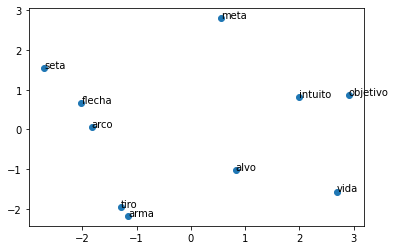

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(comp_words[:,0], comp_words[:,1])
for i, txt in enumerate(palavras):
    ax.annotate(txt, (comp_words[i,0], comp_words[i,1]))

In [ ]:
def distances(mat):
    dists = np.zeros((mat.shape[0], mat.shape[0]))
    for i in np.arange(mat.shape[0]):
        dists[i, :] = np.sum((mat - mat[i, :])**2, axis=1)
    return dists

In [ ]:
dmat = distances(embedd) 
np.fill_diagonal(dmat, np.inf)

dmatPCA = distances(comp_words) 
np.fill_diagonal(dmatPCA, np.inf)

palavras_base = [0] # [0,1,2,3]
n_vizinhos = 2

for p in palavras_base:
    print('-', palavras[p])
    print('\tglove 50d: ', end='')
    for i in range(n_vizinhos):
        prox = np.argmin(dmat[p,:])
        print('%d. %s (d=%.2f)\t' % (i+1,palavras[prox],dmat[p,prox]), end='')
        dmat[p, prox] = np.inf
    print('\n\tpca 2d   : ', end='')
    for i in range(n_vizinhos):
        prox = np.argmin(dmatPCA[p,:])
        print('%d. %s (d=%.2f)\t' % (i+1,palavras[prox],dmatPCA[p,prox]), end='')
        dmatPCA[p,prox] = np.inf         
    print()

- objetivo
	glove 50d: 1. intuito (d=6.31)	2. alvo (d=16.16)	
	pca 2d   : 1. intuito (d=0.83)	2. vida (d=5.91)	
